1) Import necessary libraries

In [1]:
import pandas as pd                       # importing pandas libarary, pyton data analysis library 
pd.set_option('display.max_rows', None)   # to retrieve output for all rows

import numpy as np                        # importing numpy or python array object library 
import seaborn as sn
import matplotlib.pyplot as plt           # importing matplotlib library, python data visualization library 
%matplotlib inline
import statistics as st 

from sklearn import preprocessing         # Import label encoder 

2) Load dataset

In [2]:
df = pd.read_excel("C:/Users/Asus/Desktop/Data/research/Book1 - Copy.xlsx")

In [3]:
df.head()

,Date,Time,Shift,BatchNo1,S.G.,Height,Adjustment1,BatchNo2,CTR,pH,...,Defect_Type:OD,Defect_Type:PD,Defect_Type:PF,Defect_Type:PH,Defect_Type:PT,Defect_Type:HD,Defect_Type:SD,Defect_Type:WEB,Defect_Type:WR,Rejection
0,2020-11-01,6.00 a.m. - 7.00 a.m.,A-day,1145,0.805,14.7,NaN,967,C2,NaN,...,No,Yes,Yes,Yes,No,No,Yes,No,No,Reject
1,2020-11-01,7.00 a.m. - 8.00 a.m.,A-day,1145,0.805,14.7,NaN,967,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Not reject
2,2020-11-01,8.00 a.m. - 9.00 a.m.,A-day,1145,0.805,14.7,NaN,967,NaN,NaN,...,No,No,No,Yes,No,No,No,No,No,Reuse
3,2020-11-01,9.00 a.m. - 10.00 a.m.,A-day,1146,0.805,14.7,NaN,967,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Reuse
4,2020-11-01,10.00 a.m. - 11.00 a.m.,A-day,1146,0.805,14.7,NaN,967,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Reuse


In [4]:
print(df.shape)

(1440, 53)


3) Descriptive analysis of dataframe

In [5]:
df.describe(include='all')

C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Date,Time,Shift,BatchNo1,S.G.,Height,Adjustment1,BatchNo2,CTR,pH,...,Defect_Type:OD,Defect_Type:PD,Defect_Type:PF,Defect_Type:PH,Defect_Type:PT,Defect_Type:HD,Defect_Type:SD,Defect_Type:WEB,Defect_Type:WR,Rejection
count,1440,1440,1440,1440.000000,1440.000000,1440.0,0.0,1440.000000,158,0.0,...,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440
unique,61,24,2,NaN,NaN,NaN,NaN,NaN,1,NaN,...,1,2,2,2,2,2,2,2,2,3
top,2020-11-30 00:00:00,12.00 p.m. - 1.00 a.m.,B-night,NaN,NaN,NaN,NaN,NaN,C2,NaN,...,No,No,No,No,No,No,No,No,No,Not reject
freq,24,60,720,NaN,NaN,NaN,NaN,NaN,158,NaN,...,1440,1276,1360,1332,1410,1432,1168,1432,1416,768
first,2020-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1226.040278,0.801667,14.7,NaN,1084.131944,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,35.269947,0.002358,0.0,NaN,205.056518,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1145.000000,0.800000,14.7,NaN,967.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1203.000000,0.800000,14.7,NaN,1012.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             1440 non-null   datetime64[ns]
 1   Time                             1440 non-null   object        
 2   Shift                            1440 non-null   object        
 3   BatchNo1                         1440 non-null   int64         
 4   S.G.                             1440 non-null   float64       
 5   Height                           1440 non-null   float64       
 6   Adjustment1                      0 non-null      float64       
 7   BatchNo2                         1440 non-null   int64         
 8   CTR                              158 non-null    object        
 9   pH                               0 non-null      float64       
 10  Viscosity                        720 non-null    float64    

In [7]:
# skewness - a measure of symmetry
# dataset is symmetric if it looks same to left & right of center point

# (skeweness value < -1) OR (skeweness value > +1)  ------------->  highly skewed
# (-1 < skeweness value < -0.5)  OR (0.5 < skeweness value < 1) ------------->  moderately skewed
# (-0.5 < skeweness value < 0.5) ------------->  approximately symmetric

print(df.skew())

BatchNo1                          -0.341285
S.G.                               0.707844
Height                             0.000000
Adjustment1                             NaN
BatchNo2                           2.975735
pH                                      NaN
Viscosity                         -0.511857
Adjustment2                             NaN
BatchNo3                          -1.130168
Adjustment3                             NaN
Former_Cooling_Tank_Temperature   -1.041207
Former_Cooling_Tank_Height         1.155905
Former_Temperature                -0.010722
Chain_Speed                        0.000000
Z-01_Oven_Temperature             -0.373783
Z-02_Oven_Temperature             -0.099584
Z-03_Oven_Temperature             -0.694067
Z-04_Oven_Temperature             -0.565540
Z-05_Oven_Temperature              0.054723
Z-06_Oven_Temperature             -1.117656
Tem-01                                  NaN
TDS-01                                  NaN
Tem-02                          

4) Data Preprocessing

In [8]:
# check for empty columns 

df.isnull().sum() 

Date                                  0
Time                                  0
Shift                                 0
BatchNo1                              0
S.G.                                  0
Height                                0
Adjustment1                        1440
BatchNo2                              0
CTR                                1282
pH                                 1440
Viscosity                           720
Adjustment2                        1440
BatchNo3                              0
Adjustment3                        1440
Former_Cooling_Tank_Temperature       0
Former_Cooling_Tank_Height            0
Former_Temperature                    0
Chain_Speed                           0
Z-01_Oven_Temperature                 0
Z-02_Oven_Temperature                 0
Z-03_Oven_Temperature                 0
Z-04_Oven_Temperature                 0
Z-05_Oven_Temperature                 0
Z-06_Oven_Temperature                 0
Tem-01                             1440


In [9]:
# remove empty columns. 

df.drop(["Adjustment1"], axis=1, inplace=True)
df.drop(["pH"], axis=1, inplace=True)
df.drop(["Adjustment2"], axis=1, inplace=True)
df.drop(["Adjustment3"], axis=1, inplace=True)

df.drop(["Tem-01"], axis=1, inplace=True)
df.drop(["TDS-01"], axis=1, inplace=True)
df.drop(["Tem-05"], axis=1, inplace=True)
df.drop(["TDS-05"], axis=1, inplace=True)

In [10]:
# remove unrelated columns

df.drop(["Date"], axis=1, inplace=True)
df.drop(["Time"], axis=1, inplace=True)
df.drop(["Shift"], axis=1, inplace=True)

# batch no. refers to the client order no. according to the tanks

df.drop(["BatchNo1"], axis=1, inplace=True)
df.drop(["BatchNo2"], axis=1, inplace=True)
df.drop(["BatchNo3"], axis=1, inplace=True)

In [11]:
# view the dataframe after removing columns

df.head()

,S.G.,Height,CTR,Viscosity,Former_Cooling_Tank_Temperature,Former_Cooling_Tank_Height,Former_Temperature,Chain_Speed,Z-01_Oven_Temperature,Z-02_Oven_Temperature,...,Defect_Type:OD,Defect_Type:PD,Defect_Type:PF,Defect_Type:PH,Defect_Type:PT,Defect_Type:HD,Defect_Type:SD,Defect_Type:WEB,Defect_Type:WR,Rejection
0,0.805,14.7,C2,31.0,48.2,16.0,44.7,3,33,100,...,No,Yes,Yes,Yes,No,No,Yes,No,No,Reject
1,0.805,14.7,NaN,NaN,48.2,16.0,43.3,3,33,103,...,No,No,No,No,No,No,No,No,No,Not reject
2,0.805,14.7,NaN,31.5,48.2,16.0,44.9,3,34,102,...,No,No,No,Yes,No,No,No,No,No,Reuse
3,0.805,14.7,NaN,NaN,48.2,16.0,43.6,3,34,104,...,No,No,No,No,No,No,No,No,No,Reuse
4,0.805,14.7,NaN,31.5,48.2,16.0,44.8,3,35,105,...,No,No,No,No,No,No,No,No,No,Reuse


In [12]:
# As a practice viscosity is measured every 2 hours.
# With the investigation conduct in the factory,it is identified that the captured viscosity value is valid for 2 hours period.

# replacing NaN cells in viscosity column with the values in above row.

cols = ['Viscosity']
df[cols] = df[cols].ffill()

In [13]:
# CTR represent Chloroform Test Result. It represents how old the latex mixture is. 
# The compound tank is only refiling if the previous mixture is finished.So value is repeating unless there is a re-fill.

# replacing NaN cells in viscosity column with the values in above row.

cols = ['CTR']
df[cols] = df[cols].ffill()

In [14]:
# Apply lable encoding to CTR

label_encoder = preprocessing.LabelEncoder()           # label_encoder object knows how to understand labels. 

df['CTR']= label_encoder.fit_transform(df['CTR'])      # Encode labels in column 'CTR'. 

In [15]:
# TDS2,3,4 means Total Solid Content in tank 2,3,4. It represents how clean the latex compound is. 
# Tank is re-filled with latex, only if the previous mixture is finished. 

# replacing NaN cells in TDS2, TDS3, TDS4 columns with the values in above row.
cols = ['TDS-02','TDS-03','TDS-04']
df[cols] = df[cols].ffill()

In [16]:
# NaN values in defect type indicates any kind of defect has not occured.
# replacing NaN values in Defect Type to 0.

df['Defect_Type:CD'] = df['Defect_Type:CD'].fillna(0)
df['Defect_Type:DF'] = df['Defect_Type:DF'].fillna(0)
df['Defect_Type:DM'] = df['Defect_Type:DM'].fillna(0)
df['Defect_Type:JF'] = df['Defect_Type:JF'].fillna(0)
df['Defect_Type:LG'] = df['Defect_Type:LG'].fillna(0)
df['Defect_Type:MRB'] = df['Defect_Type:MRB'].fillna(0)
df['Defect_Type:OD'] = df['Defect_Type:OD'].fillna(0)
df['Defect_Type:PD'] = df['Defect_Type:PD'].fillna(0)
df['Defect_Type:PF'] = df['Defect_Type:PF'].fillna(0)
df['Defect_Type:PT'] = df['Defect_Type:PT'].fillna(0)
df['Defect_Type:PH'] = df['Defect_Type:PH'].fillna(0)
df['Defect_Type:HD'] = df['Defect_Type:HD'].fillna(0)
df['Defect_Type:SD'] = df['Defect_Type:SD'].fillna(0)
df['Defect_Type:WEB'] = df['Defect_Type:WEB'].fillna(0)
df['Defect_Type:WR'] = df['Defect_Type:WR'].fillna(0)

In [17]:
# change yes and no values in "Defect Occurence" column to Yes as 1 and No as 0.

a = {'No': 0, 'Yes': 1}
df['Defect_Occurrence'] = df['Defect_Occurrence'].map(a).fillna(df['Defect_Occurrence'])

df['Defect_Type:CD'] = df['Defect_Type:CD'].map(a).fillna(df['Defect_Type:CD'])
df['Defect_Type:DF'] = df['Defect_Type:DF'].map(a).fillna(df['Defect_Type:DF'])
df['Defect_Type:DM'] = df['Defect_Type:DM'].map(a).fillna(df['Defect_Type:DM'])
df['Defect_Type:JF'] = df['Defect_Type:JF'].map(a).fillna(df['Defect_Type:JF'])
df['Defect_Type:LG'] = df['Defect_Type:LG'].map(a).fillna(df['Defect_Type:LG'])
df['Defect_Type:MRB'] = df['Defect_Type:MRB'].map(a).fillna(df['Defect_Type:MRB'])
df['Defect_Type:OD'] = df['Defect_Type:OD'].map(a).fillna(df['Defect_Type:OD'])
df['Defect_Type:PD'] = df['Defect_Type:PD'].map(a).fillna(df['Defect_Type:PD'])
df['Defect_Type:PF'] = df['Defect_Type:PF'].map(a).fillna(df['Defect_Type:PF'])
df['Defect_Type:PT'] = df['Defect_Type:PT'].map(a).fillna(df['Defect_Type:PT'])
df['Defect_Type:PH'] = df['Defect_Type:PH'].map(a).fillna(df['Defect_Type:PT'])
df['Defect_Type:HD'] = df['Defect_Type:HD'].map(a).fillna(df['Defect_Type:HD'])
df['Defect_Type:SD'] = df['Defect_Type:SD'].map(a).fillna(df['Defect_Type:SD'])
df['Defect_Type:WEB'] = df['Defect_Type:WEB'].map(a).fillna(df['Defect_Type:WEB'])
df['Defect_Type:WR'] = df['Defect_Type:WR'].map(a).fillna(df['Defect_Type:WR'])

In [18]:
# change Not reject , Reject and Reuse values in "Rejection" column

d = {'Not reject': 0, 'Reject': 1, 'Reuse': 2}
df['Rejection'] = df['Rejection'].map(d).fillna(df['Rejection'])

In [19]:
# Filling all NaN values with 0 

df.fillna(value = 0,  inplace = True) 

In [20]:
# View pre processed dataframe

df.head()

,S.G.,Height,CTR,Viscosity,Former_Cooling_Tank_Temperature,Former_Cooling_Tank_Height,Former_Temperature,Chain_Speed,Z-01_Oven_Temperature,Z-02_Oven_Temperature,...,Defect_Type:OD,Defect_Type:PD,Defect_Type:PF,Defect_Type:PH,Defect_Type:PT,Defect_Type:HD,Defect_Type:SD,Defect_Type:WEB,Defect_Type:WR,Rejection
0,0.805,14.7,0,31.0,48.2,16.0,44.7,3,33,100,...,0,1,1,1,0,0,1,0,0,1
1,0.805,14.7,0,31.0,48.2,16.0,43.3,3,33,103,...,0,0,0,0,0,0,0,0,0,0
2,0.805,14.7,0,31.5,48.2,16.0,44.9,3,34,102,...,0,0,0,1,0,0,0,0,0,2
3,0.805,14.7,0,31.5,48.2,16.0,43.6,3,34,104,...,0,0,0,0,0,0,0,0,0,2
4,0.805,14.7,0,31.5,48.2,16.0,44.8,3,35,105,...,0,0,0,0,0,0,0,0,0,2


5) Data visualization

In [21]:
# No. of supported glove batches produced with defect and not with defects

df.groupby('Defect_Occurrence').size()

Defect_Occurrence
0    768
1    672
dtype: int64

In [22]:
# No. of supported gloves batches which has reject due to defects and which has reused by correcting the defects 

df.groupby('Rejection').size()

Rejection
0    768
1    536
2    136
dtype: int64

<AxesSubplot:ylabel='Defect_Occurrence'>

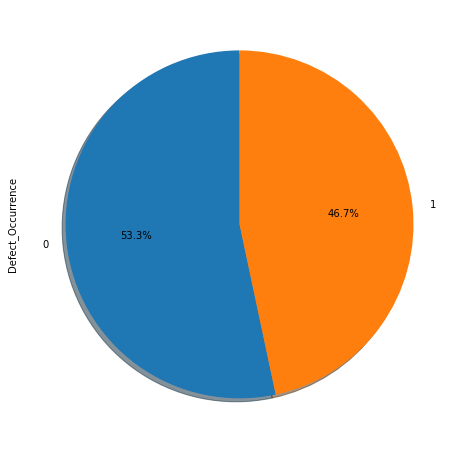

In [23]:
# Plot frequency of defect occurrence outcomes

df.Defect_Occurrence.value_counts().plot.pie(autopct= '%1.1f%%', shadow=True, startangle=90, figsize= (8,8) )

<AxesSubplot:ylabel='Rejection'>

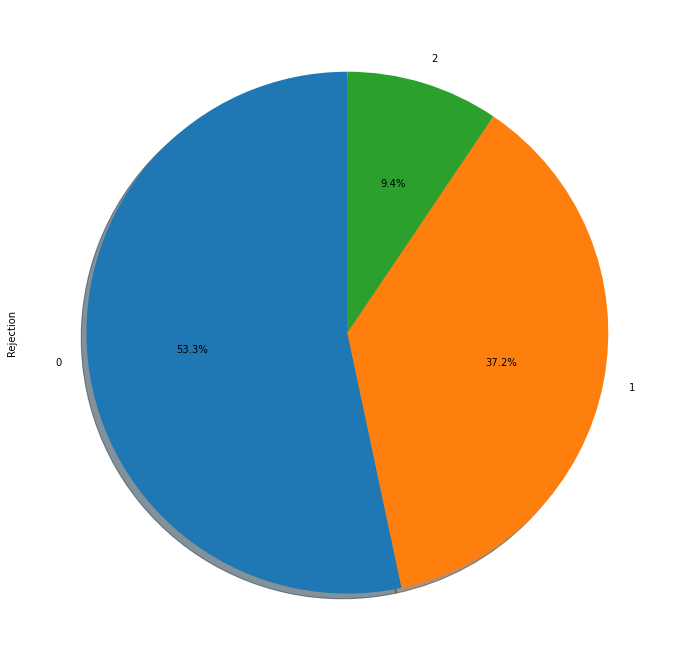

In [24]:
# Plot frequency of glove rejection outcomes

df.Rejection.value_counts().plot.pie(autopct= '%1.1f%%', shadow=True, startangle=90, figsize= (12,12) )

Linear Regression plots between oven temperatures and room temperature

C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Z-01_Oven_Temperature', ylabel='Room_Temperature'>

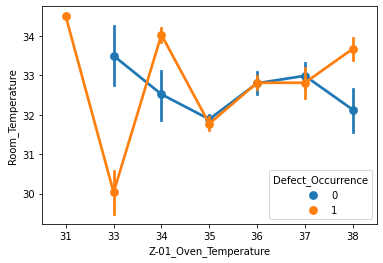

In [25]:
sn.pointplot(df['Z-01_Oven_Temperature'], df['Room_Temperature'], hue=df['Defect_Occurrence'])

C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Z-02_Oven_Temperature', ylabel='Room_Temperature'>

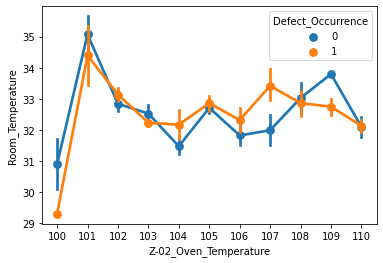

In [26]:
sn.pointplot(df['Z-02_Oven_Temperature'], df['Room_Temperature'], hue=df['Defect_Occurrence'])

C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Z-03_Oven_Temperature', ylabel='Room_Temperature'>

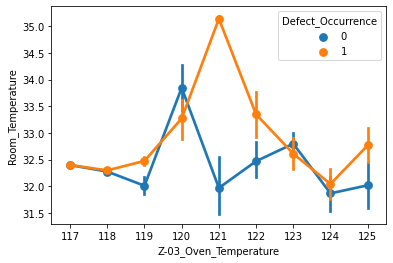

In [27]:
sn.pointplot(df['Z-03_Oven_Temperature'], df['Room_Temperature'], hue=df['Defect_Occurrence'])

C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Z-04_Oven_Temperature', ylabel='Room_Temperature'>

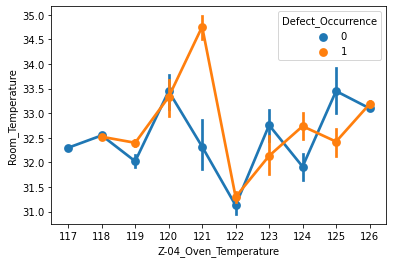

In [28]:
sn.pointplot(df['Z-04_Oven_Temperature'], df['Room_Temperature'], hue=df['Defect_Occurrence'])

C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Z-05_Oven_Temperature', ylabel='Room_Temperature'>

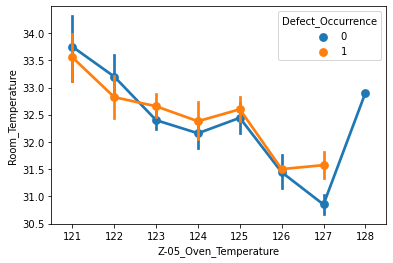

In [29]:
sn.pointplot(df['Z-05_Oven_Temperature'], df['Room_Temperature'], hue=df['Defect_Occurrence'])

C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Z-06_Oven_Temperature', ylabel='Room_Temperature'>

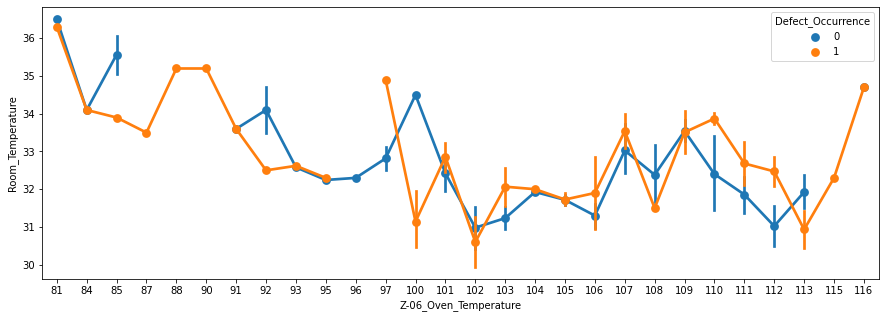

In [30]:
plt.figure(figsize=(15,5))
sn.pointplot(df['Z-06_Oven_Temperature'], df['Room_Temperature'], hue=df['Defect_Occurrence'])

6) Correlation Coefficient Analyze between production parameters and Defect Occurrence

In [31]:
# Remove all columns between column name 'Defect Type:  CD' to 'Reject / Not Reject' 
# as they are not related to defect occurence prediction

df.drop(df.loc[:, "Defect_Type:CD" : "Rejection"].columns, axis = 1, inplace=True) 

In [32]:
# Correlation Matrix

df.corr()

,S.G.,Height,CTR,Viscosity,Former_Cooling_Tank_Temperature,Former_Cooling_Tank_Height,Former_Temperature,Chain_Speed,Z-01_Oven_Temperature,Z-02_Oven_Temperature,...,Z-06_Oven_Temperature,Tem-02,TDS-02,Tem-03,TDS-03,Tem-04,TDS-04,Humidity,Room_Temperature,Defect_Occurrence
S.G.,1.000000,NaN,NaN,0.588179,-0.431973,-0.408248,-0.254598,NaN,-0.523492,-0.337097,...,-0.489422,0.223727,-0.146427,-0.007195,0.254885,0.244688,0.311357,-0.125623,0.051836,0.082680
Height,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Viscosity,0.588179,NaN,NaN,1.000000,-0.490286,-0.788489,-0.083868,NaN,-0.376814,-0.305256,...,-0.523069,0.560885,0.138546,0.098509,0.307270,0.117682,0.242714,-0.071642,-0.005513,-0.047852
Former_Cooling_Tank_Temperature,-0.431973,NaN,NaN,-0.490286,1.000000,0.587841,0.045042,NaN,0.076624,0.175850,...,0.262022,-0.565908,0.113276,0.035520,-0.197400,-0.226497,-0.218747,0.179290,-0.124620,0.016197
Former_Cooling_Tank_Height,-0.408248,NaN,NaN,-0.788489,0.587841,1.000000,-0.154696,NaN,0.003387,0.072663,...,0.233481,-0.618486,0.001329,-0.023498,-0.094294,-0.099894,-0.010281,0.158467,-0.100342,-0.025717
Former_Temperature,-0.254598,NaN,NaN,-0.083868,0.045042,-0.154696,1.000000,NaN,0.382442,0.285124,...,0.201165,-0.086032,-0.065944,0.055871,-0.297838,-0.141284,-0.352439,-0.243678,0.111379,0.025849
Chain_Speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Z-01_Oven_Temperature,-0.523492,NaN,NaN,-0.376814,0.076624,0.003387,0.382442,NaN,1.000000,0.516975,...,0.359576,-0.067734,0.010847,-0.051333,-0.259819,-0.087450,-0.261884,-0.184797,0.162926,0.083095
Z-02_Oven_Temperature,-0.337097,NaN,NaN,-0.305256,0.175850,0.072663,0.285124,NaN,0.516975,1.000000,...,0.509972,-0.305619,-0.195320,-0.181533,-0.393007,-0.106725,-0.392224,0.039702,-0.025851,0.158499


Text(0.5, 1.05, 'Correlation of Support Glove Production Parameters')

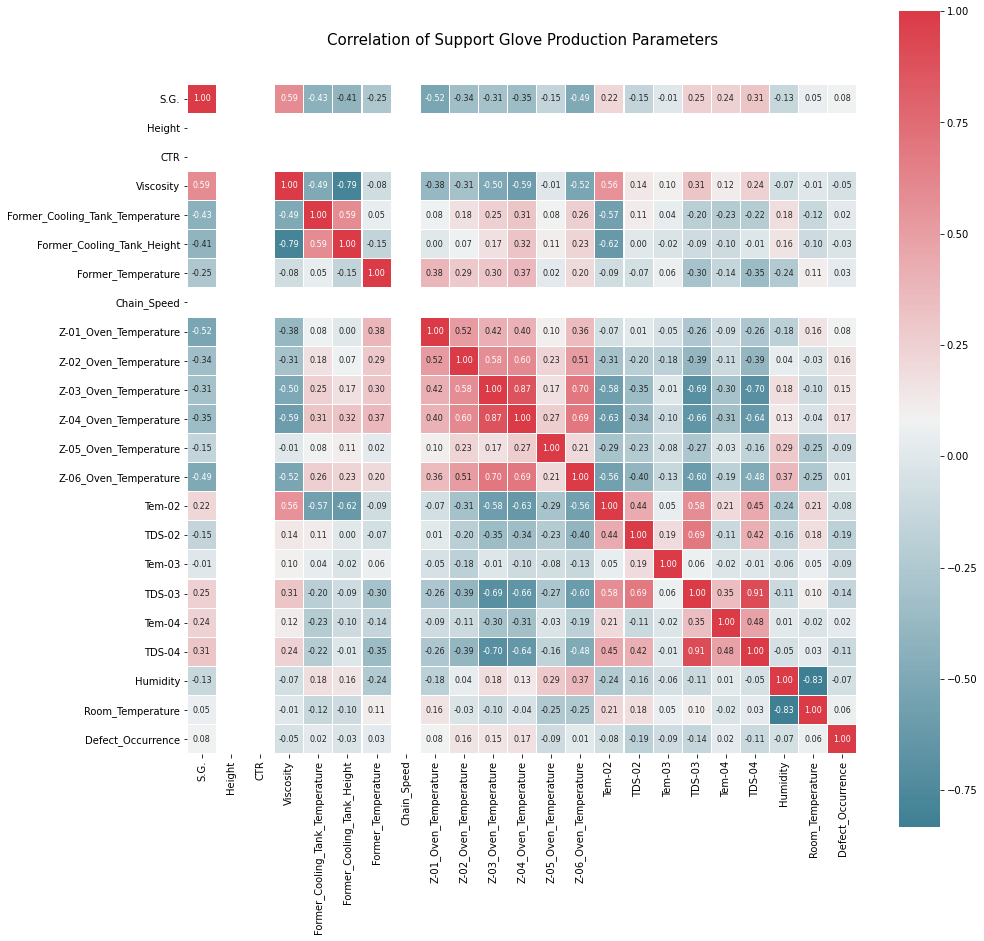

In [33]:
# Correlation Plot

fig, ax = plt.subplots()

colormap = sn.diverging_palette(220, 10, as_cmap = True)
fig.set_size_inches(15, 15)

sn.heatmap(df.corr(), cbar = True, square = True, fmt= '.2f', cmap=colormap , ax=ax, annot=True, annot_kws={'size': 8},
           linewidths=0.1, linecolor='white')
plt.title('Correlation of Support Glove Production Parameters', y=1.05, size=15)

In [34]:
# Since Height, CTR and Chain speed has no relationship with Defect Occurrence, 
# drop those parameters from dataset before model building.

df.drop(["Height"], axis=1, inplace=True)
df.drop(["CTR"], axis=1, inplace=True)
df.drop(["Chain_Speed"], axis=1, inplace=True)

In [35]:
df.head()

,S.G.,Viscosity,Former_Cooling_Tank_Temperature,Former_Cooling_Tank_Height,Former_Temperature,Z-01_Oven_Temperature,Z-02_Oven_Temperature,Z-03_Oven_Temperature,Z-04_Oven_Temperature,Z-05_Oven_Temperature,Z-06_Oven_Temperature,Tem-02,TDS-02,Tem-03,TDS-03,Tem-04,TDS-04,Humidity,Room_Temperature,Defect_Occurrence
0,0.805,31.0,48.2,16.0,44.7,33,100,120,120,121,102,48.5,560.0,35.0,344.0,35.0,180.0,63,29.3,1
1,0.805,31.0,48.2,16.0,43.3,33,103,120,120,122,101,48.5,560.0,35.0,344.0,35.0,180.0,59,31.5,0
2,0.805,31.5,48.2,16.0,44.9,34,102,120,120,123,101,48.5,560.0,35.0,344.0,35.0,180.0,52,33.8,1
3,0.805,31.5,48.2,16.0,43.6,34,104,120,120,122,100,48.5,560.0,35.0,344.0,35.0,180.0,50,34.5,1
4,0.805,31.5,48.2,16.0,44.8,35,105,121,121,122,97,48.5,560.0,35.0,344.0,35.0,180.0,48,34.9,1


In [36]:
#output data set use for defect occurrence prediction.

occurrence_predict_df = "C:/Users/Asus/Desktop/Data/research/Defect_Occurrence.xlsx"

df.to_excel(occurrence_predict_df,index=False)

C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in 

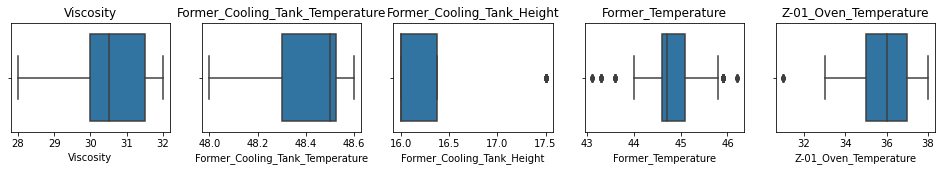

In [37]:
# Box plot for outliers

fig = plt.figure(figsize= (20,2))

for i in np.arange(1,6):
    graphs = plt.subplot(1,6,i,title= df.columns[i])
    sn.boxplot(df[df.columns[i]])

C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in 

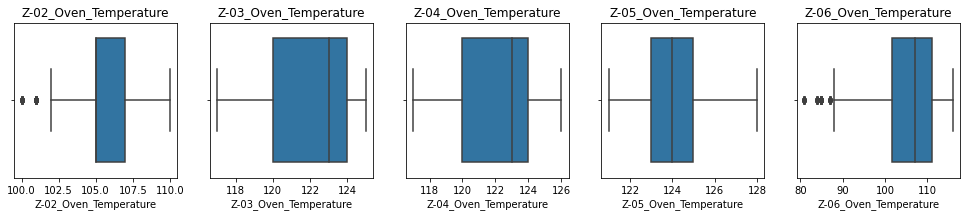

In [38]:
fig = plt.figure(figsize= (38,20))

for i in np.arange(6,11):
    graphs = plt.subplot(6,11,i,title= df.columns[i])
    sn.boxplot(df[df.columns[i]]) 

C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in 

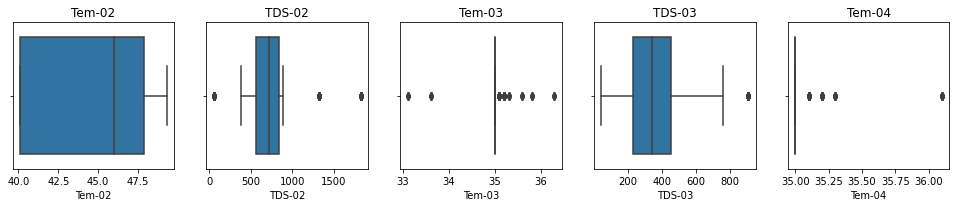

In [39]:
fig = plt.figure(figsize= (55,35))

for i in np.arange(11,16):
    graphs = plt.subplot(11,16,i,title= df.columns[i])
    sn.boxplot(df[df.columns[i]]) 

C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Asus\anaconda3\envs\intutive-deep-learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in 

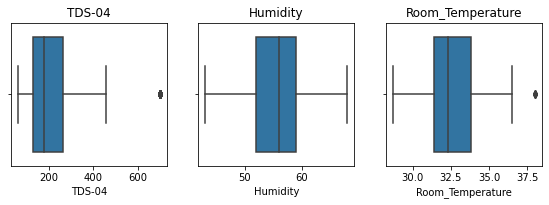

In [41]:
fig = plt.figure(figsize= (70,50))

for i in np.arange(16,19):
    graphs = plt.subplot(16,21,i,title= df.columns[i])
    sn.boxplot(df[df.columns[i]]) 